In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 13)

In [6]:
data=data.drop(data.columns[data.columns.str.contains('unnamed', case=False)], axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data = pd.get_dummies(data=data, columns=['Sex', 'Embarked'], dtype='int')

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [12]:
data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [13]:
data.head()

,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,0,1,0,0,1
1,2,1,1,38.0,71.2833,1,0,1,0,0
2,3,1,3,26.0,7.9250,1,0,0,0,1
3,4,1,1,35.0,53.1000,1,0,0,0,1
4,5,0,3,35.0,8.0500,0,1,0,0,1


In [15]:
data.shape

(891, 10)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   Fare         891 non-null    float64
 5   Sex_female   891 non-null    int32  
 6   Sex_male     891 non-null    int32  
 7   Embarked_C   891 non-null    int32  
 8   Embarked_Q   891 non-null    int32  
 9   Embarked_S   891 non-null    int32  
dtypes: float64(2), int32(5), int64(3)
memory usage: 52.3 KB


In [17]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,32.204208,0.352413,0.647587,0.188552,0.086420,0.722783
std,257.353842,0.486592,0.836071,13.002015,49.693429,0.477990,0.477990,0.391372,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,29.699118,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


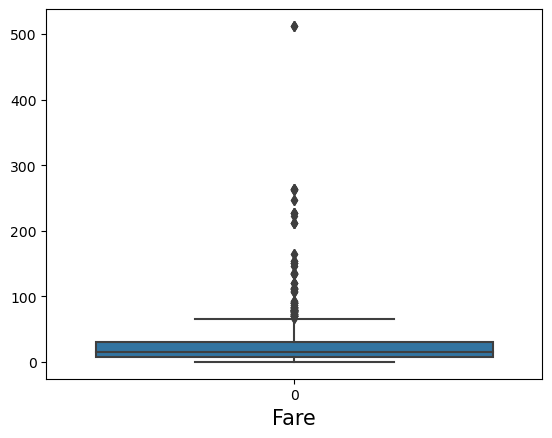

In [19]:
plt.plot(3,3)
ax=sns.boxplot(data=data["Fare"])
plt.xlabel("Fare",fontsize=15)    
plt.show()

In [20]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

In [26]:
Fare_high=(q3.Fare+(1.5*iqr.Fare))
print(Fare_high)
index=np.where(data['Fare']>Fare_high)
data=data.drop(data.index[index])
print(data.shape)
data.reset_index()

65.6344
(775, 10)


,index,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,22.000000,7.2500,0,1,0,0,1
1,2,3,1,3,26.000000,7.9250,1,0,0,0,1
2,3,4,1,1,35.000000,53.1000,1,0,0,0,1
3,4,5,0,3,35.000000,8.0500,0,1,0,0,1
4,5,6,0,3,29.699118,8.4583,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
770,886,887,0,2,27.000000,13.0000,0,1,0,0,1
771,887,888,1,1,19.000000,30.0000,1,0,0,0,1
772,888,889,0,3,29.699118,23.4500,1,0,0,0,1
773,889,890,1,1,26.000000,30.0000,0,1,1,0,0


In [27]:
data.describe()

,PassengerId,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,775.000000,775.000000,775.00000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,2.48000,29.103880,17.822091,0.314839,0.685161,0.149677,0.096774,0.753548
std,260.116285,0.473796,0.73439,12.779988,13.578085,0.464752,0.464752,0.356985,0.295841,0.431223
min,1.000000,0.000000,1.00000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,213.500000,0.000000,2.00000,22.000000,7.895800,0.000000,0.000000,0.000000,0.000000,1.000000
50%,450.000000,0.000000,3.00000,29.699118,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,670.500000,1.000000,3.00000,34.000000,26.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.00000,80.000000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
data.shape

(775, 10)

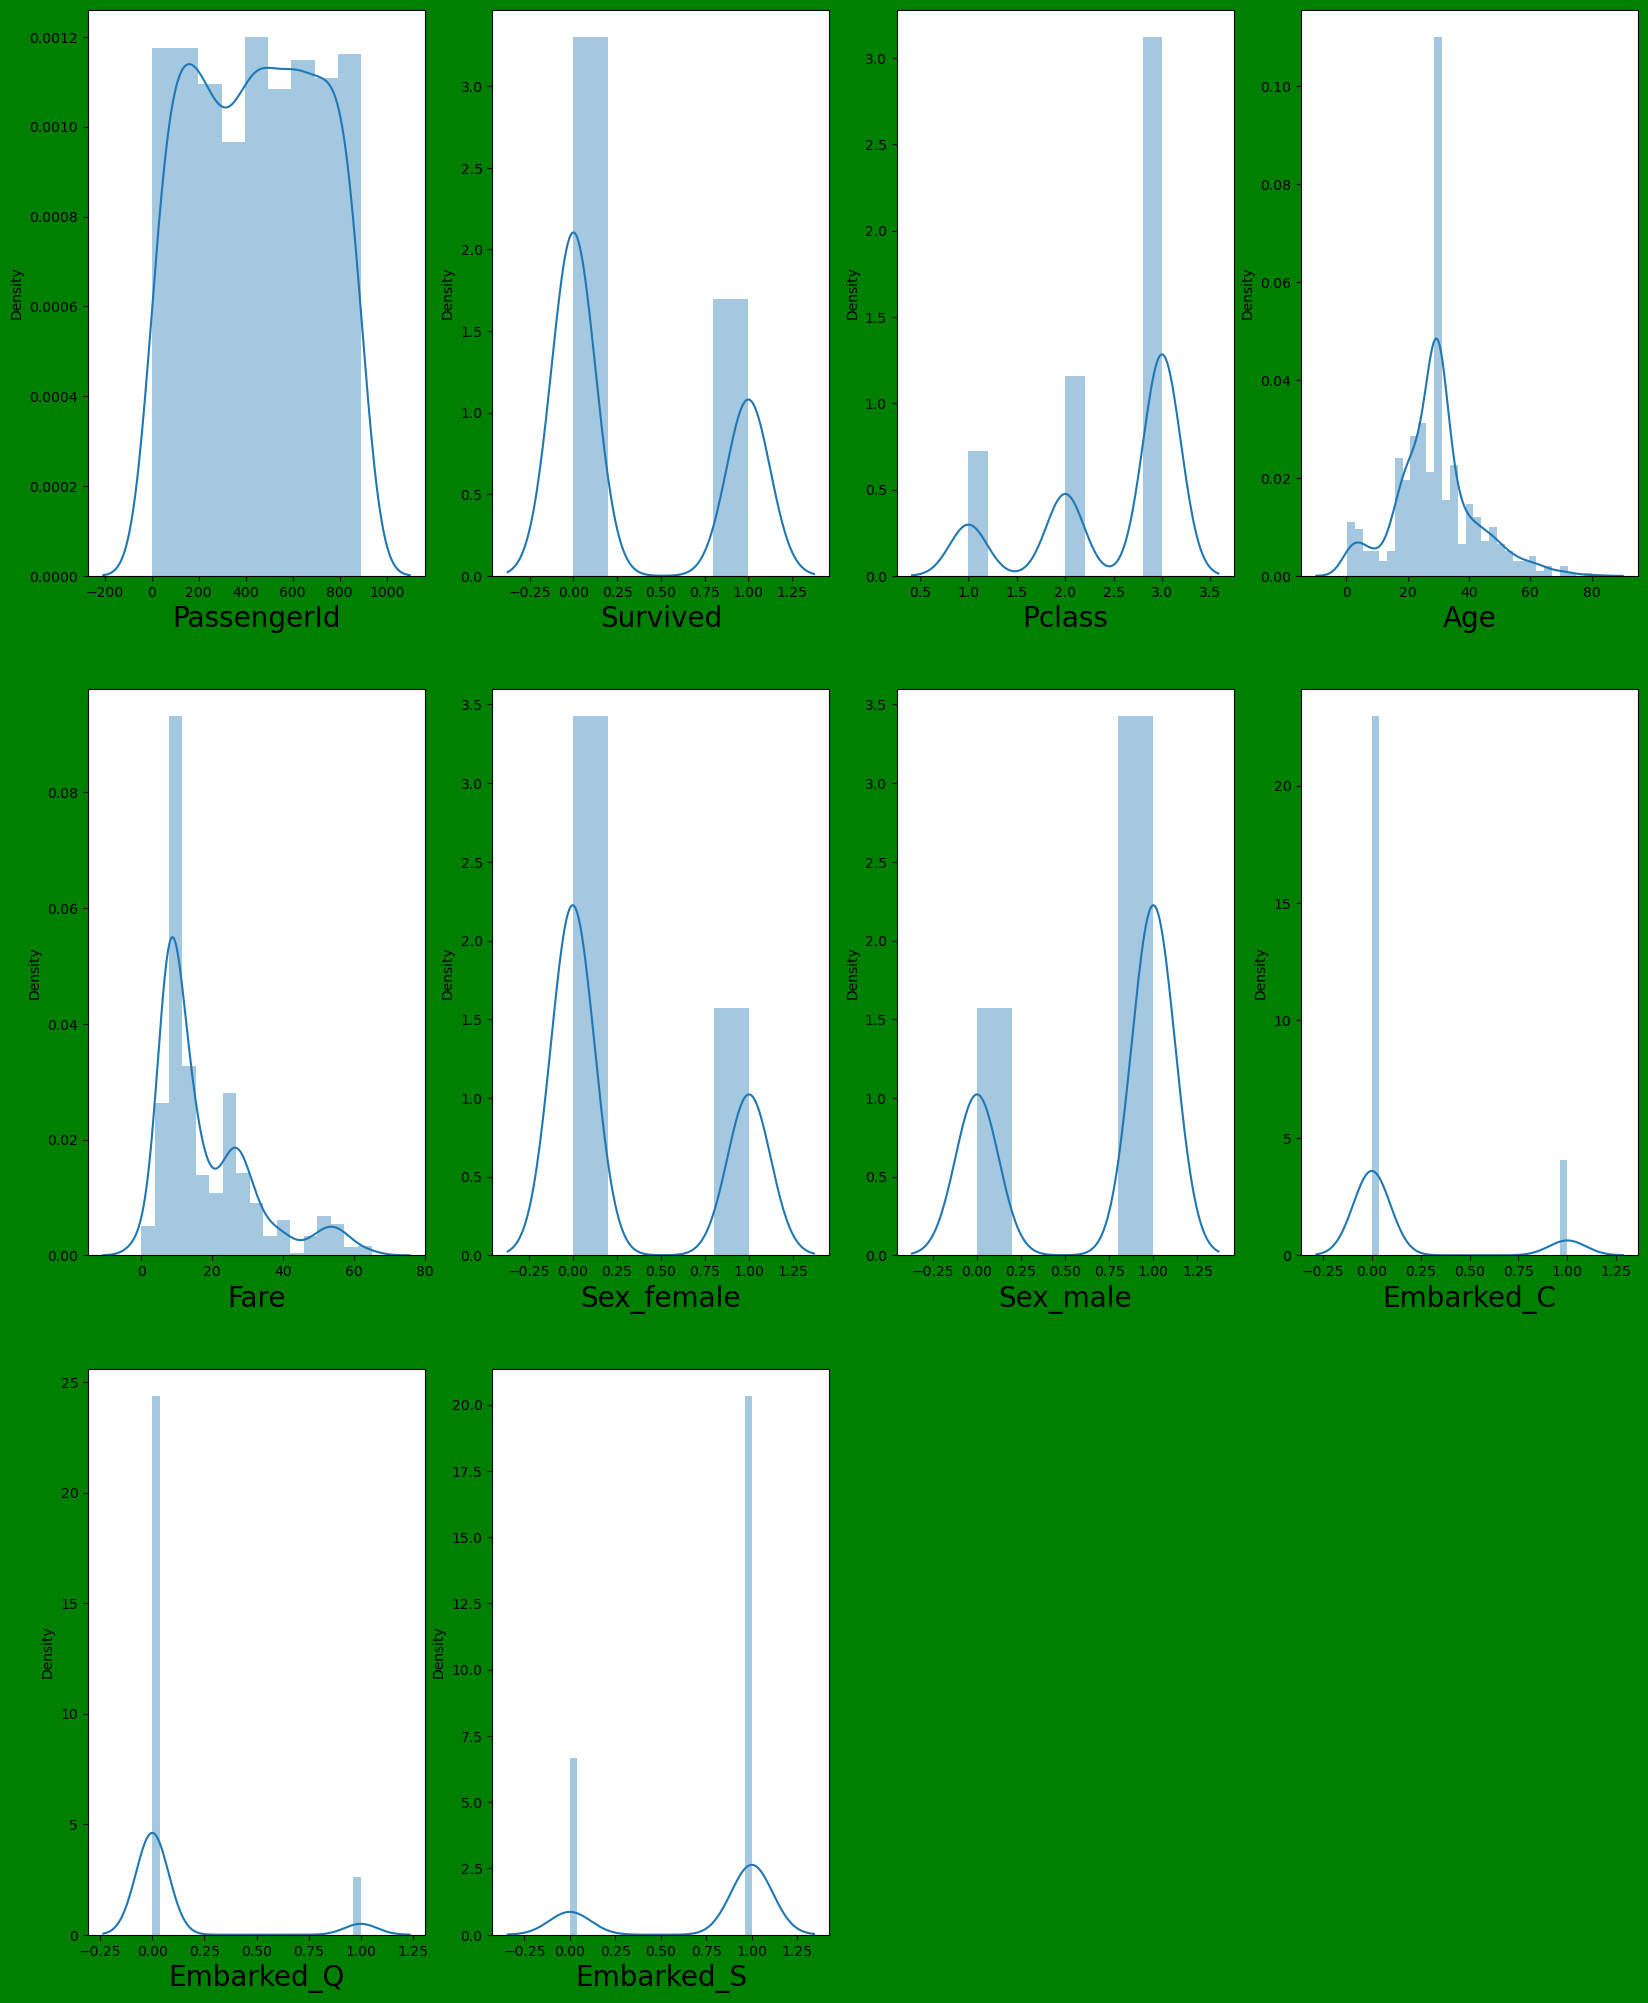

In [29]:
plt.figure(figsize=(20,25),facecolor='green')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

In [30]:
x=data.drop(columns=['Survived'])
y=data['Survived']

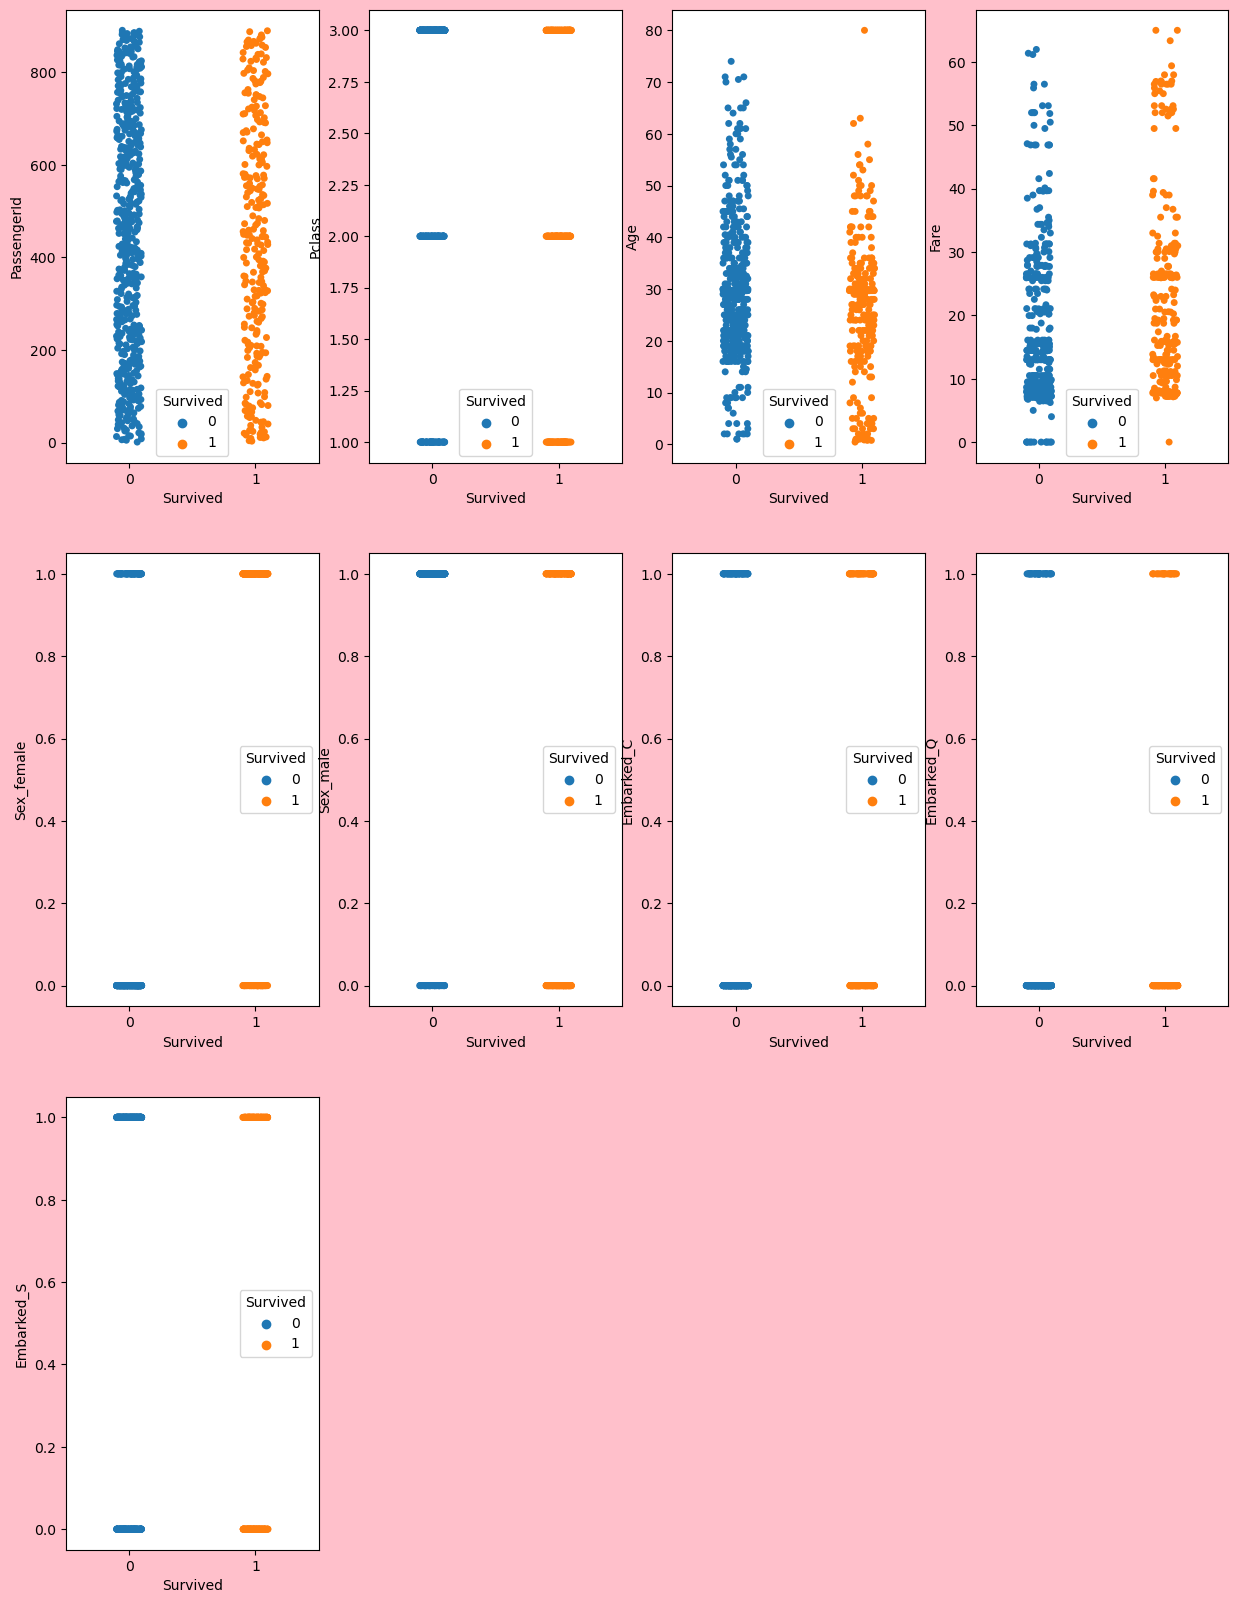

In [31]:
plt.figure(figsize=(15,20),facecolor='pink')
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax=plt.subplot(3,4,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
    plotnumber+=1
plt.show()

In [32]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [33]:
x_scaled.shape

(775, 9)

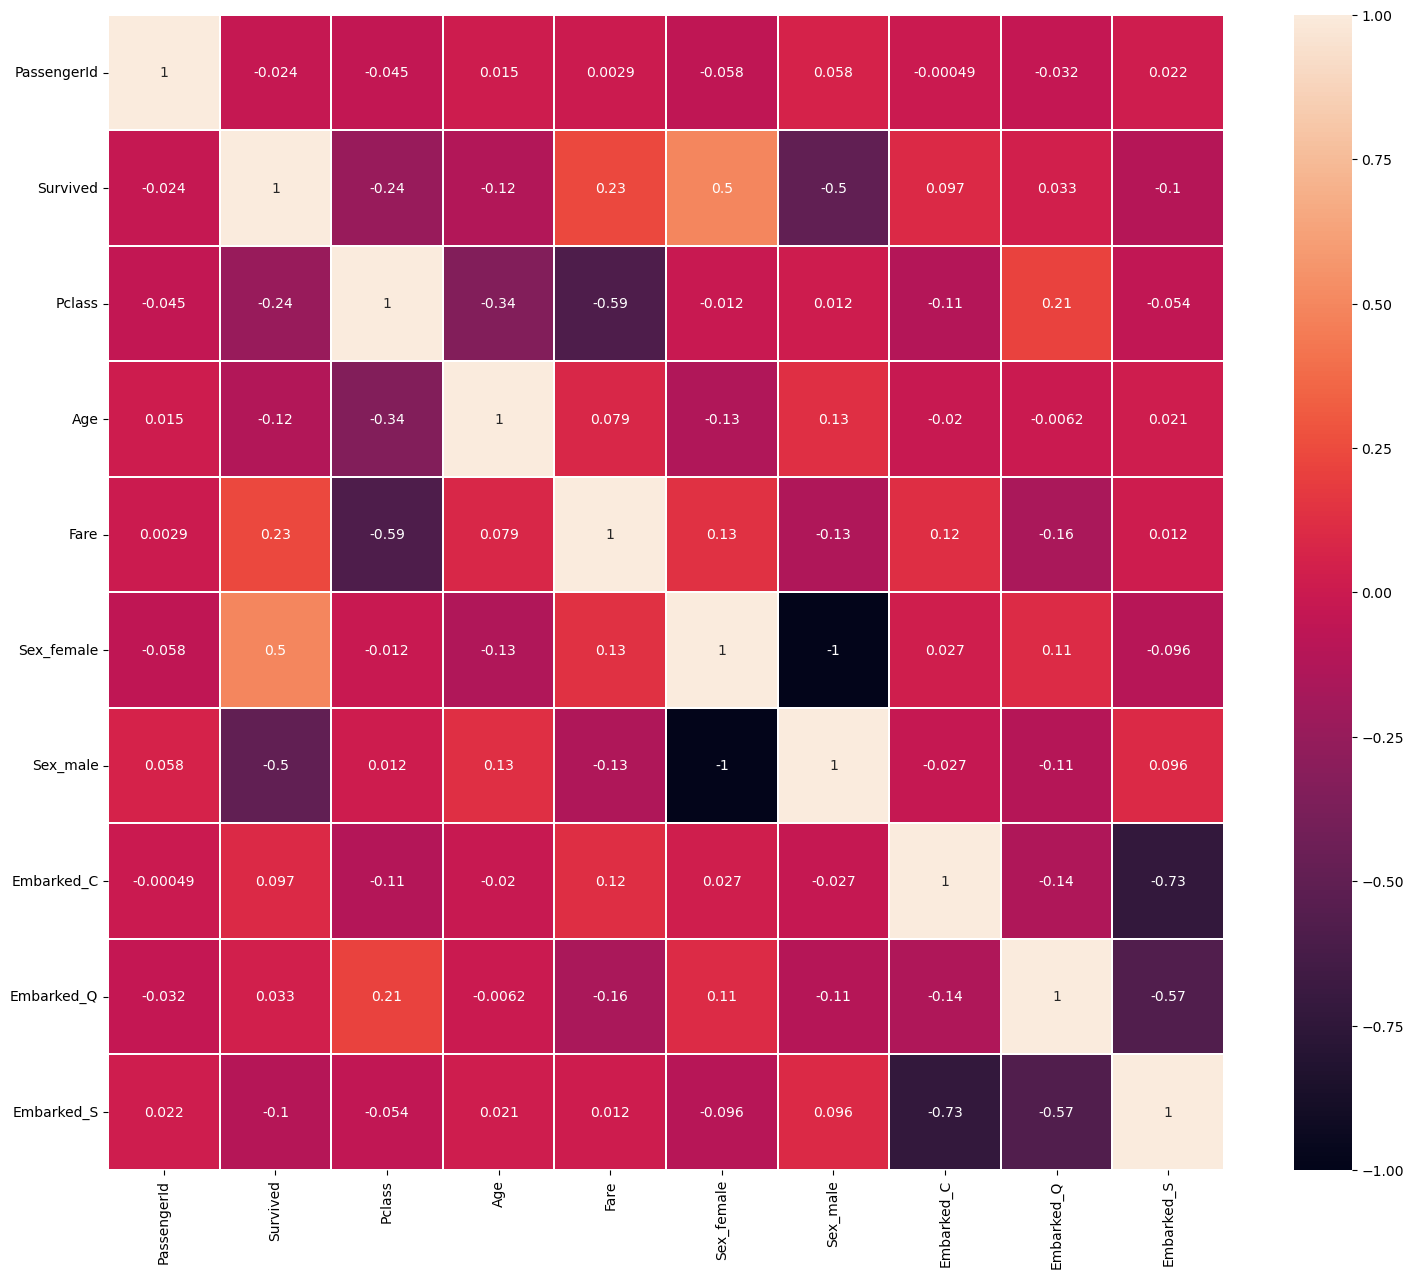

In [34]:
graph = sns.heatmap(data.corr(), annot=True, linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(18,15)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)

In [36]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score



lsvc = LinearSVC(random_state = 42, dual='auto')

scores = cross_val_score(lsvc, x, y)

print("Mean accuracy: ", scores.mean())

Mean accuracy:  0.7896774193548387


In [37]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=log_reg.predict(x_test)

In [39]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  13],
       [ 28,  44]], dtype=int64)

In [40]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.788659793814433

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       122
           1       0.77      0.61      0.68        72

    accuracy                           0.79       194
   macro avg       0.78      0.75      0.76       194
weighted avg       0.79      0.79      0.78       194



In [43]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [44]:
print('Threshold=',thresholds)
print(tpr)
print(fpr)

Threshold= [inf  1.  0.]
[0.         0.61111111 1.        ]
[0.         0.10655738 1.        ]


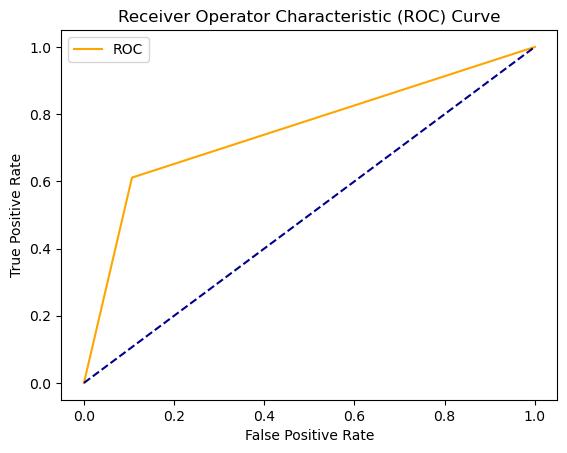

In [45]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operator Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [46]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7522768670309654
